In [40]:
##Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [42]:
## Read and load loan CSV data
loan_dataframe=pd.read_csv("loan.csv")

In [44]:
## Exploring data using info
loan_dataframe.info()
##Showing 24 objects Columns apart from int and Float

## Get Full summary and check which columns are object types
loan_dataframe.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13

In [48]:
## Get only 10 records and observe data values
loan_dataframe.head(10)
## By looking data ,observed few columns having NaN values

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [50]:
##Check and observe for null values columns
loan_dataframe.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [52]:
#Get % of missing value in each column
missing_value_percentage=loan_dataframe.isna().sum()*100/loan_dataframe.shape[0]
missing_value_percentage

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [54]:
#Sorting Result in descending order
result_desc_order=round((loan_dataframe.isna().sum()*100/loan_dataframe.shape[0]),2)
result_desc_order=result_desc_order.sort_values(ascending=False)
result_desc_order

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [138]:
##Data Clean up

In [56]:
## Data cleaning and considering "desc" columns which having 32.59 % null value,this columns also not useful 
dataframe_clean=loan_dataframe.loc[:,missing_value_percentage >= 30]
dataframe_clean.isna().sum()*100/loan_dataframe.shape[0] 


desc                               32.585543
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi    

## Dropping columns which having more than 30% null values

In [58]:
loan_dataframe.drop(missing_value_percentage[missing_value_percentage > 30].index , axis=1, inplace=True)

In [60]:
## Again Check shape of dataframe
loan_dataframe.shape

(39717, 53)

In [62]:
## Check for unique values in coloumns
unique_columns=loan_dataframe.nunique();
unique_columns=unique_columns.sort_values(ascending=False)
unique_columns


id                            39717
member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
last_credit_pull_d              106
last_pymnt_d                

In [64]:
## dropping off unique columns which having 1 unique valu in all row
loan_dataframe.drop(unique_columns[unique_columns==1].index , axis=1, inplace=True)

In [68]:
loan_dataframe.shape

(39717, 44)

## After analysis found few other columns which are not useful for our analysis

In [70]:
## remove un-useful columns
loan_dataframe.drop(["id","url", "member_id", "emp_title", "revol_bal", "title","revol_util","zip_code", "last_credit_pull_d", "addr_state","delinq_2yrs","emp_length","inq_last_6mths", "pub_rec"], axis=1, inplace=True)


In [72]:
##Again Checking shape of dataframe
loan_dataframe.shape

(39717, 30)

In [74]:
## Checking Missing value % again 
loan_dataframe.isna().sum()*100/loan_dataframe.shape[0]


loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
dti                        0.000000
earliest_cr_line           0.000000
open_acc                   0.000000
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
total_rec_int              0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_d               0

In [76]:
#impute missing values in columns which having null values with mode
loan_dataframe['last_pymnt_d'] = loan_dataframe['last_pymnt_d'].fillna(loan_dataframe['last_pymnt_d'].mode()[0])
loan_dataframe['pub_rec_bankruptcies'] = loan_dataframe['pub_rec_bankruptcies'].fillna(loan_dataframe['pub_rec_bankruptcies'].mode()[0])


In [78]:
## Checking Missing value % again 
loan_dataframe.isna().sum()*100/loan_dataframe.shape[0]

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
dti                        0.0
earliest_cr_line           0.0
open_acc                   0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pymnt_d               0.0
last_pymnt_amnt            0.0
pub_rec_bankruptcies       0.0
dtype: float64

In [80]:
#dataframe.info()
#removing % and changing int rate to float
loan_dataframe["int_rate"]=loan_dataframe["int_rate"].astype(str).str.rstrip('%').astype('float')

In [82]:
#selecting numeric dtype columns
numeric_cols=loan_dataframe.select_dtypes(include=["float64","int64"]).columns
numeric_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'open_acc', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [84]:
#impute missing values in these columns with median if any pending
loan_dataframe[numeric_cols]=loan_dataframe[numeric_cols].apply(lambda column:column.fillna(column.median()))
loan_dataframe.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,0.0


In [90]:
#converting columns to numeric
loan_dataframe[numeric_cols] = loan_dataframe[numeric_cols].apply(pd.to_numeric)

## Analysis to see who is likely to default ,for this we can ignore fully paid and current loans and Consider only Charged Off.

In [92]:
loan_dataframe['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

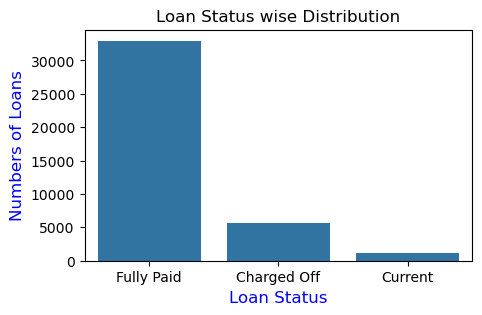

In [96]:
#Plot to show the total number of loans versus Loan Status
plt.figure(figsize=(5,3))
sns.countplot(x = 'loan_status', data = loan_dataframe)
plt.title('Loan Status wise Distribution')
# Labeling Axes
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.ylabel("Numbers of Loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

In [98]:
#Create dataframe for Charged Off only
defaulter_data=loan_dataframe[loan_dataframe["loan_status"] == 'Charged Off']

<Figure size 600x800 with 0 Axes>

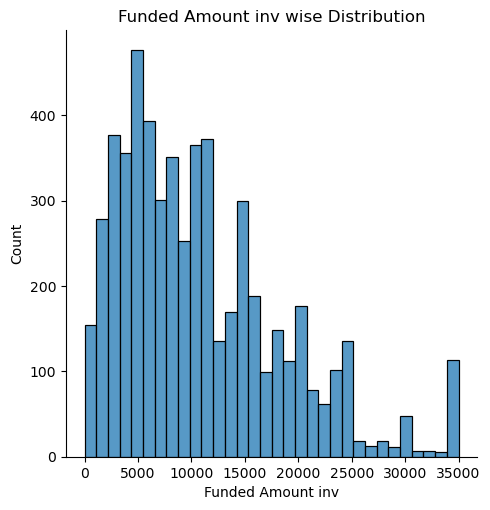

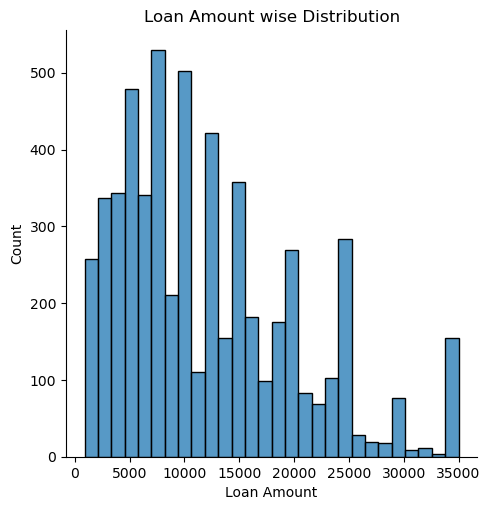

In [100]:
# Generate distribution plots with Loan amount for Charged Off and funded amount invoice
plt.figure(figsize=(6,8))

## Funded Amount Invoice and observed what range we are getting more defaulter
sns.displot(defaulter_data["funded_amnt_inv"])
plt.title('Funded Amount inv wise Distribution')
plt.xlabel('Funded Amount inv')
plt.show()
# using Loan Amount for observe what range we are getting more defaulter
sns.displot(defaulter_data["loan_amnt"])
plt.title('Loan Amount wise Distribution')
plt.xlabel('Loan Amount')
plt.show()

<Figure size 1200x800 with 0 Axes>

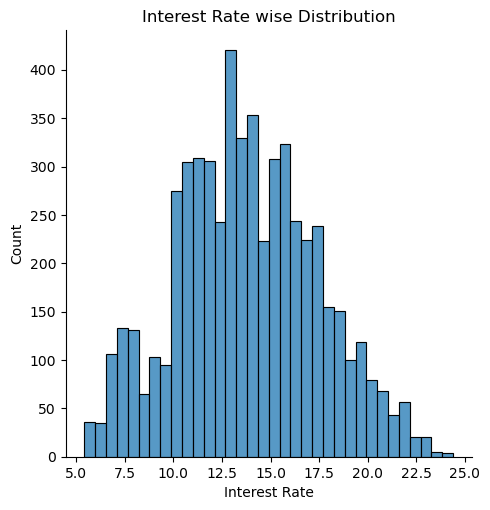

In [102]:
plt.figure(figsize=(12,8))

#Generate distribution plots with interest rate observed what range we are getting more defaulter
sns.displot(defaulter_data["int_rate"])
plt.xlabel('Interest Rate')
plt.title('Interest Rate wise Distribution')
plt.show()

<Figure size 800x300 with 0 Axes>

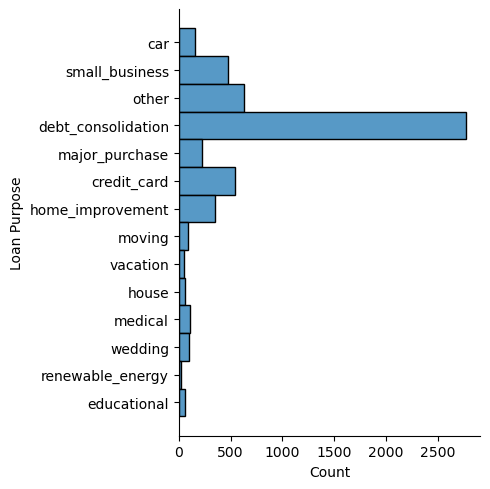

In [104]:
#Loan Defaulter - observe what was the main purpose for defaulter loan
plt.figure(figsize=(8,3))
sns.displot(y ='purpose', data=defaulter_data)
plt.ylabel('Loan Purpose')
plt.show()

<Figure size 600x400 with 0 Axes>

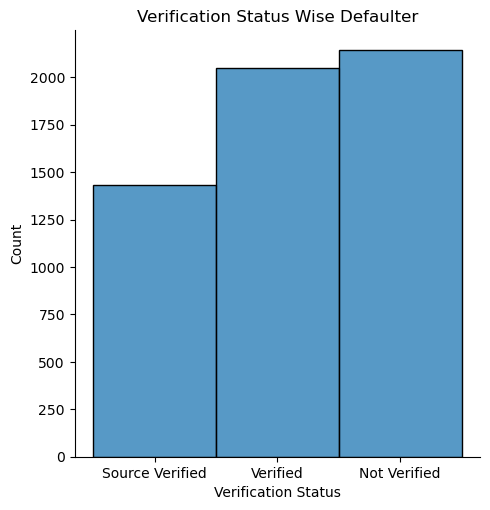

In [108]:
#Generate distribution plots with verification status observed how many defaulters not verified
plt.figure(figsize=(6,4))
sns.displot(defaulter_data["verification_status"])
plt.xlabel('Verification Status')
plt.title('Verification Status Wise Defaulter')
plt.show()

## Creating bins for Create categorical graph using Some Numerical Columns

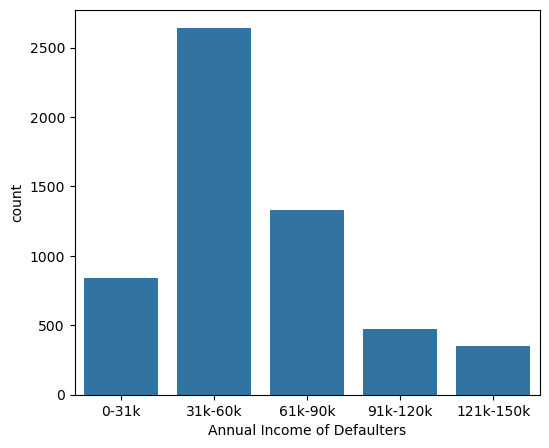

In [112]:
#creating bins for annual_in
loan_dataframe['annual_income_slots'] = pd.cut(loan_dataframe['annual_inc'], bins=[loan_dataframe['annual_inc'].min(),30000,60000,90000,120000,loan_dataframe['annual_inc'].max()],precision =0,labels =['0-31k','31k-60k','61k-90k','91k-120k','121k-150k'])
plt.figure(figsize=(6,5))
# Defaulter-Annual Income slots

sns.countplot(x ='annual_income_slots', data = loan_dataframe[loan_dataframe.loan_status == 'Charged Off'])
plt.xlabel('Annual Income of Defaulters')
plt.show()#creating bins for int_rate and annual_inc
loan_dataframe['annual_income_slots'] = pd.cut(loan_dataframe['annual_inc'], bins=[loan_dataframe['annual_inc'].min(),30000,60000,90000,120000,loan_dataframe['annual_inc'].max()],precision =0,labels =['0-31k','31k-60k','61k-90k','91k-120k','121k-150k'])


Text(0.5, 0, 'Intereset Rate-Defaulters')

<Figure size 600x500 with 0 Axes>

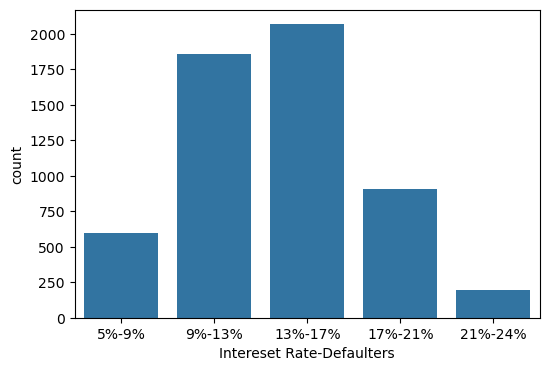

In [114]:
#creating bins for int_rate
loan_dataframe['int_rate_slots'] = pd.cut(loan_dataframe['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
plt.figure(figsize=(6,5))
# Defaulter-Interest Slots

plt.figure(figsize=(6,4))
sns.countplot(x ='int_rate_slots', data = loan_dataframe[loan_dataframe.loan_status == 'Charged Off'])
plt.xlabel('Intereset Rate-Defaulters')

## Analyzing home_ownership and creating chart based on this

In [116]:
#checking unique values for home_ownership
defaulter_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

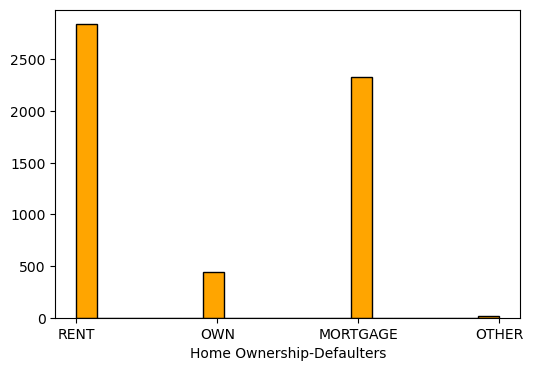

In [118]:
## creating chart based on Term
plt.figure(figsize=(6,4))
plt.hist(defaulter_data["home_ownership"], bins = 20,edgecolor='black',color='orange')
plt.xlabel('Home Ownership-Defaulters')
plt.show()


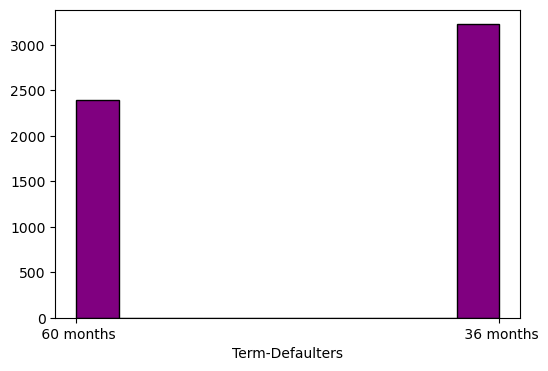

In [120]:
## creating chart 
plt.figure(figsize=(6,4))
plt.hist(defaulter_data["term"], bins = 10,edgecolor='black',color='purple')
plt.xlabel('Term-Defaulters')
plt.show()

In [122]:
#Get month and year from loan issue date
defaulter_month_year = defaulter_data['issue_d'].str.partition("-", True)     
defaulter_data['issue_month']=defaulter_month_year[0]                       
defaulter_data['issue_year']='20' + defaulter_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

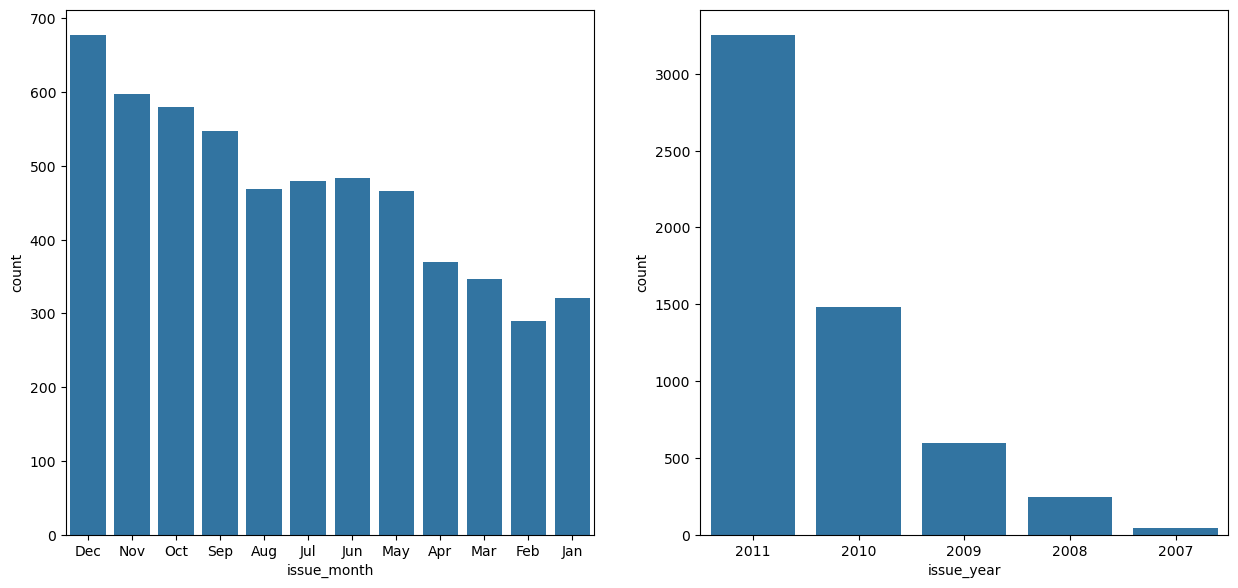

In [124]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=defaulter_data)
plt.subplot(222)
sns.countplot(x='issue_year', data=defaulter_data)

## Analysing annual income with other columns for more insights


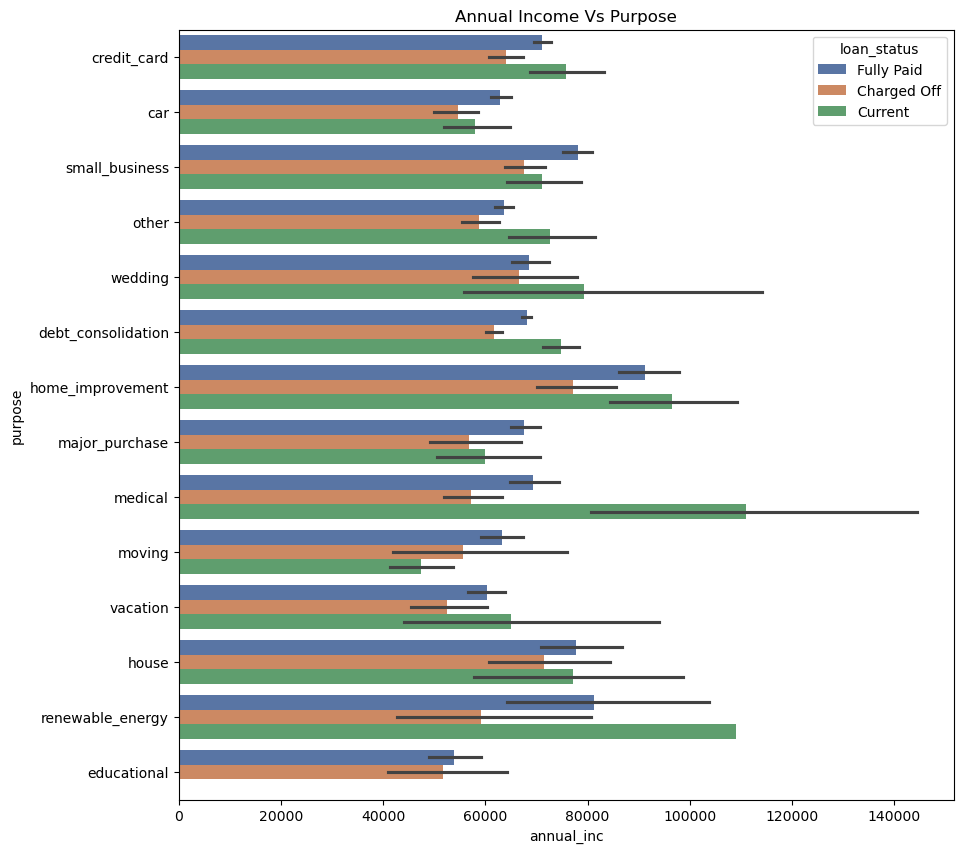

In [126]:
#Annual income vs loan purpose 
plt.figure(figsize=(10,10))
sns.barplot(data =loan_dataframe,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.title("Annual Income Vs Purpose")
plt.show()

## Observations

1. Defaulter applicants who received loan mostly on interest at the rate of 13-17%
2. Mostly defaulter applicants having house_ownership as 'RENT'
3. Defaulter applicants who have an income of range "31K-60K"
4. Defaulter applicants funded amount by investor is between "5000-10000"
5. Defaulter applicants loan amounts is between "5000 - 10000"
6. Defaulter applicants term of "36 months"
7. Mostly Defaulter applicants loan status is "Not verified"
8. Defaulter applicants mostly purpose is 'debt_consolidation'
9. Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses".Annual income of those who applied isnot the highest.